In [2]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression as lrs 

In [3]:
# Import duckdb to use SQL query
import duckdb as dkb

In [4]:
# Load the data csv file
data = pd.read_csv(r"survey_results_public.csv")
data.head(5)

C:\Users\huysi\AppData\Local\Temp\ipykernel_32696\691958225.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"survey_results_public.csv")


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [5]:
# Query Number of Responses by Age with Duckdb
query1 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' >=65') AS Age, count(ResponseID) as 'Number of Responses'
    from data
    where Age != 'Prefer not to say'
    group by Age
    order by Age desc
        """

con = dkb.connect()
result1 = con.sql(query1).df()
result1

,Age,Number of Responses
0,55-64,2626
1,45-54,6265
2,35-44,13232
3,25-34,16485
4,18-24,9195
5,>=65,942


In [6]:
# Add labels to attributes
labels = result1['Age']
size = result1['Number of Responses']

In [7]:
text_properties = {
    'fontsize': 16,      # Increase font size
    'fontweight': 'semi-bold' # Set font weight
}

# Customize wedge (slice) properties (for borders)
wedge_properties = {
    'linewidth': 0.4,        # Set border width
    'edgecolor': 'black' # Set border color
}

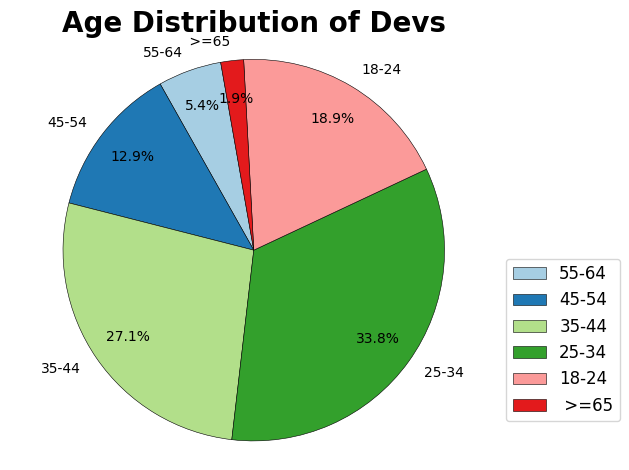

In [8]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.title('Age Distribution of Devs', fontsize = 20, fontweight = 'bold')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

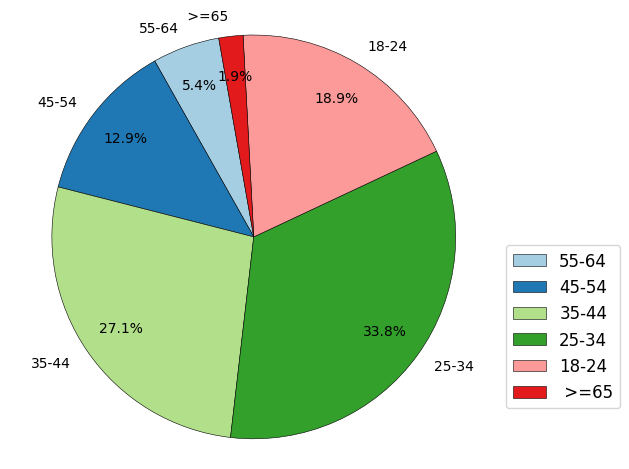

In [9]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

In [10]:
query2 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' Over 65') AS Age, round(avg(WorkExp),2) as 'Avg. Years of Exp'
    from data
    where Age != 'Prefer not to say'
    group by age
    order by avg(workexp)
"""
result2 = con.sql(query2).df()
display(result2)

,Age,Avg. Years of Exp
0,18-24,2.94
1,25-34,6.92
2,35-44,14.70
3,45-54,23.85
4,55-64,32.80
5,Over 65,41.37


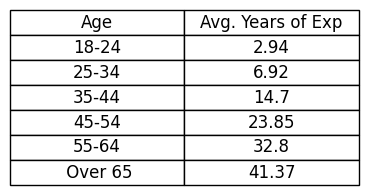

In [11]:
fig, ax = plt.subplots(figsize=(3,1))
ax.axis("off")

table = ax.table(cellText =result2.values, colLabels=result2.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust cell size

plt.show()

In [12]:
demoq = """
    select edlevel, count(edlevel)
    from data
    group by edlevel
"""
re_demo = con.sql(demoq).df()
re_demo

,EdLevel,count(edlevel)
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20247
1,"Associate degree (A.A., A.S., etc.)",1560
2,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2620
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12575
4,Other (please specify):,701
5,"Secondary school (e.g. American high school, G...",3627
6,Some college/university study without earning ...,6175
7,Primary/elementary school,582
8,None,0


In [13]:
con.execute("""DROP TABLE IF EXISTS data_clean;""")
con.execute("""
    CREATE TABLE data_clean AS
SELECT
    CASE
        WHEN LOWER(TRIM(edlevel)) LIKE '%associate%' THEN 'Associate''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%professional%' THEN 'Professional''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%master%' THEN 'Master''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%bachelor%' THEN 'Bachelor''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%secondary%' THEN 'Secondary school'
        WHEN LOWER(TRIM(edlevel)) LIKE '%other%' THEN 'Other'
        WHEN LOWER(TRIM(edlevel)) LIKE '%some%' THEN 'Some college without earning a degree'
        ELSE TRIM(edlevel)
    END AS edlevel,
    responseid
FROM data
""")
result3 = con.sql("""
    SELECT edlevel as 'Education', 
                  COUNT(responseid) * 100.0 / (SELECT COUNT(responseid) FROM data_clean WHERE edlevel != 'NA') AS 'Percentage of Responses'  
    FROM data_clean
    WHERE edlevel != 'NA'
    GROUP BY edlevel
    ORDER BY edlevel ASC
""").df()

res_sorted = result3.sort_values(by='Percentage of Responses', ascending = True)
res_sorted

,Education,Percentage of Responses
4,Primary/elementary school,1.210306
3,Other,1.457774
0,Associate's degree,3.244120
5,Professional's degree,5.448458
6,Secondary school,7.542579
7,Some college without earning a degree,12.841308
2,Master's degree,26.150519
1,Bachelor's degree,42.104935


In [14]:
x = res_sorted['Percentage of Responses']
y = res_sorted['Education']

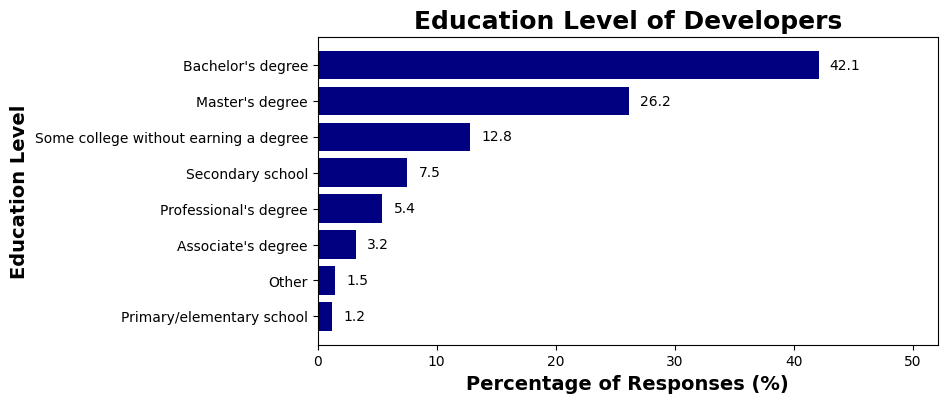

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Percentage of Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')
ax.set_title("Education Level of Developers", fontsize = 18, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

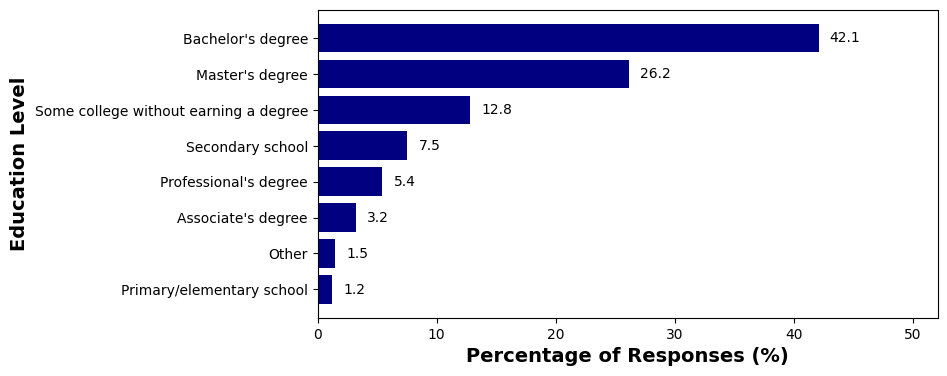

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Percentage of Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

In [17]:
queryAI = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', '>=65') AS Age,
            Workexp as 'YrsOfExp', 
             CASE
                WHEN LOWER(aiselect) LIKE '%every day%' 
                    OR LOWER(aiselect) LIKE '%daily%' THEN 'Daily'
                WHEN LOWER(aiselect) LIKE '%week%' THEN 'Weekly'
                WHEN LOWER(aiselect) LIKE '%month%' THEN 'Monthly'
                WHEN LOWER(aiselect) LIKE '%plan to soon%' THEN 'I plan to use AI soon'
                WHEN LOWER(aiselect) LIKE '%don''t plan%' 
                    OR LOWER(aiselect) LIKE '%never%' THEN 'I don''t plan to use AI'
                ELSE aiselect
            END AS AISelect, 
            replace(replace(aicomplex, ' at handling complex tasks', ''), 'I don''t use AI tools for complex tasks / I don''t know' , 'I don''t use AI for complex tasks') as AIComplex, 
            aiacc, 
            aisent
    from data
    where aiselect is not null
    and aicomplex is not null
    and aiacc is not null
    and aisent is not null
    and Age != 'Prefer not to say'
    and workexp < 65
"""
resultAI = con.sql(queryAI).df()
resultAI

,Age,YrsOfExp,AISelect,AIComplex,AIAcc,AISent
0,25-34,8.0,Monthly,Bad,Neither trust nor distrust,Indifferent
1,25-34,2.0,Weekly,Bad,Neither trust nor distrust,Indifferent
2,35-44,10.0,Daily,Neither good or bad,Somewhat trust,Favorable
3,35-44,4.0,Weekly,Bad,Somewhat trust,Favorable
4,35-44,21.0,Weekly,"Good, but not great",Neither trust nor distrust,Favorable
...,...,...,...,...,...,...
30479,18-24,1.0,Monthly,Neither good or bad,Somewhat trust,Favorable
30480,45-54,8.0,Daily,Very well,Highly trust,Very favorable
30481,25-34,2.0,Weekly,"Good, but not great",Somewhat distrust,Favorable
30482,45-54,29.0,Daily,Neither good or bad,Somewhat distrust,Very favorable


In [18]:
order = ["Daily", "Weekly", "Monthly", "I plan to use AI soon", "I don't plan to use AI"]
order2 = ["Very well", "Good, but not great", "Neither good or bad", "Bad", "Very poor", "I don't use AI for complex tasks"]
order3 = ["18-24", "25-34", "35-44", "45-54", "55-64", ">=65"]
order4 = ["Highly trust", "Somewhat trust", "Neither trust nor distrust", "Somewhat distrust", "Highly distrust"]

In [19]:
resultAI.to_csv("ai_use.csv")

In [20]:
# Hypothesis 1: There is no relationship between the age range (Age) of devs 
# and the frequency of AI usage (AISelect).

In [21]:
contigency = pd.crosstab(resultAI['Age'], resultAI['AISelect']).reindex(index=order3, columns=order)
display(contigency)

AISelect,Daily,Weekly,Monthly,I plan to use AI soon,I don't plan to use AI
Age,,,,,
18-24,1815,679,430,66,529
25-34,5334,1862,1323,384,1463
35-44,4503,1634,1264,463,1343
45-54,2087,819,672,334,701
55-64,700,317,318,243,474
>=65,159,85,120,104,259


In [22]:
from scipy.stats import chi2_contingency

In [23]:
chi2, p, dof, expected = chi2_contingency(contigency)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 1006.4007012992652
Degrees of Freedom: 20
P-value: 1.6849683663261205e-200
Expected Frequencies:
 [[1685.15818134  622.90132529  476.41100249  184.00754494  550.52194594]
 [4964.0095788  1834.89489568 1403.37495079  542.03529721 1621.68527752]
 [4408.9944233  1629.73927306 1246.46663824  481.43150505 1440.36816035]
 [2209.04651621  816.55123999  624.51945283  241.21250492  721.67028605]
 [ 982.64978349  363.22634825  277.80488125  107.29851725  321.02046975]
 [ 348.14151686  128.68691773   98.4230744    38.01463063  113.73386039]]


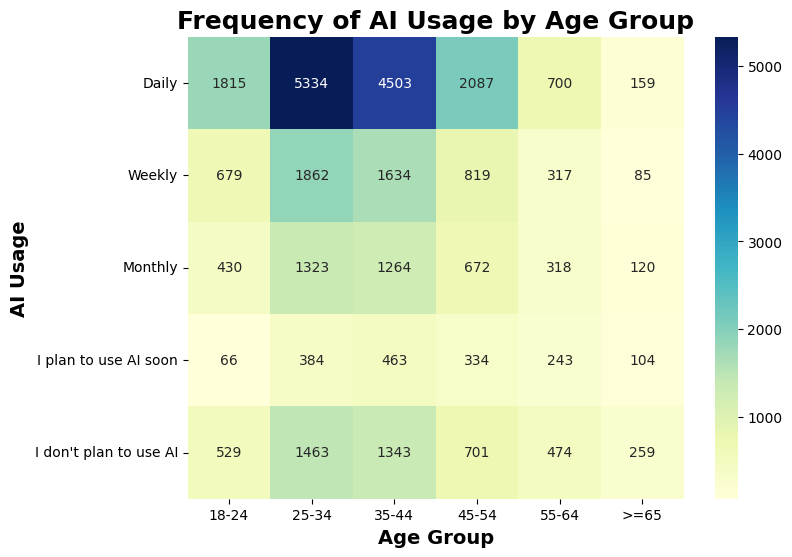

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(contigency.T, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Frequency of AI Usage by Age Group", fontsize = 18, fontweight = 'bold')
plt.xlabel("Age Group", fontsize = 14, fontweight = 'bold')
plt.ylabel("AI Usage", fontsize = 14, fontweight = 'bold')
plt.show()

In [25]:
#Hypothesis 2: There is no association between 
# the frequency of AI usage (AISelect) and 
# the complexity of AI in handling complex tasks (AIComplex) that devs find.

In [26]:
contigency2 = pd.crosstab(resultAI['AISelect'], resultAI['AIComplex']).reindex(index=order, columns=order2)
display(contigency2)

AIComplex,Very well,"Good, but not great",Neither good or bad,Bad,Very poor,I don't use AI for complex tasks
AISelect,,,,,,
Daily,1058,5554,2424,3451,1759,352
Weekly,99,1327,943,1652,1047,328
Monthly,64,549,606,1157,1212,539
I plan to use AI soon,30,205,223,229,172,735
I don't plan to use AI,13,65,144,339,1149,3059


In [27]:
chi2, p, dof, expected = chi2_contingency(contigency2)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 14647.0551772215
Degrees of Freedom: 20
P-value: 0.0
Expected Frequencies:
 [[ 605.29694266 3687.33105892 2078.31386957 3269.75278835 2556.7091589
  2400.5961816 ]
 [ 223.74176617 1362.98386039  768.22726676 1208.63036347  945.06114683
   887.35559638]
 [ 171.12347461 1042.44521716  587.56003149  924.39168088  722.80714473
   678.67245112]
 [  66.09421336  402.63088833  226.93740979  357.03424747  279.17484582
   262.12839522]
 [ 197.7436032  1204.6089752   678.96142239 1068.19091983  835.24770371
   784.24737567]]


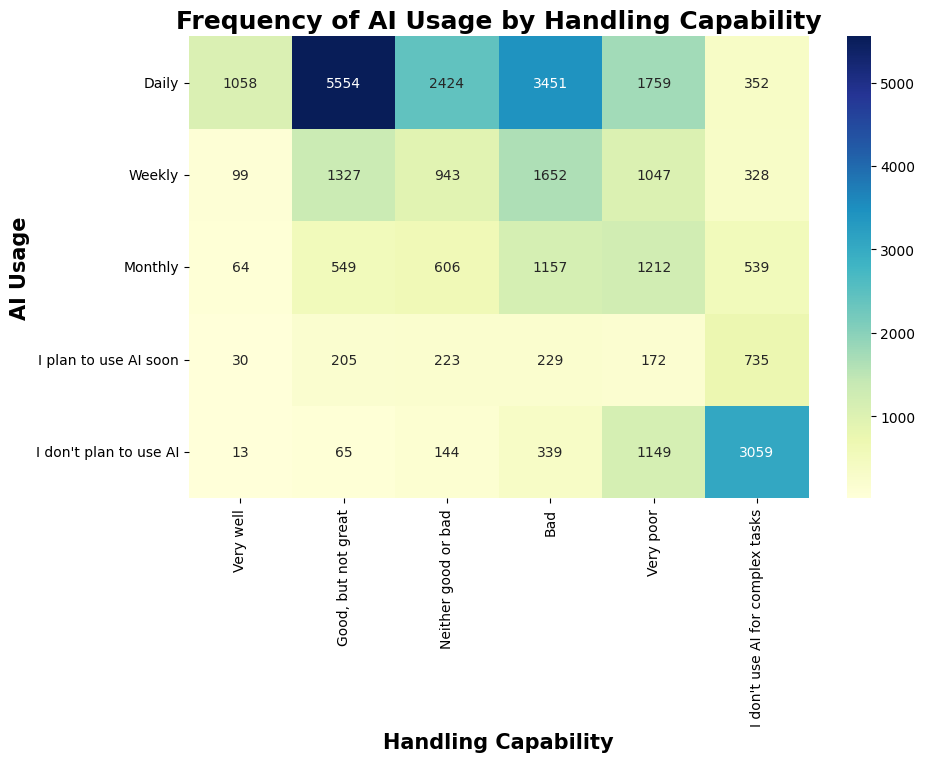

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(contigency2, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Frequency of AI Usage by Handling Capability", fontsize = 18, fontweight = 'bold')
plt.xlabel("Handling Capability", fontsize = 15, fontweight = 'bold')
plt.ylabel("AI Usage", fontsize = 15, fontweight = 'bold')
plt.show()

In [29]:
# Hypothesis 3: There is no association between the age range (Age) and 
# the degree to which developers trust AI (AIAcc).

In [30]:
contigency3 = pd.crosstab(resultAI['Age'], resultAI['AIAcc']).reindex(index=order3, columns=order4)
display(contigency3)

AIAcc,Highly trust,Somewhat trust,Neither trust nor distrust,Somewhat distrust,Highly distrust
Age,,,,,
18-24,106,1012,778,922,701
25-34,323,3168,2152,2707,2016
35-44,273,2758,1996,2373,1807
45-54,128,1369,1053,1224,839
55-64,53,587,443,562,407
>=65,23,183,184,181,156


In [31]:
chi2, p, dof, expected = chi2_contingency(contigency3)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 32.05533126542819
Degrees of Freedom: 20
P-value: 0.042712288260990876
Expected Frequencies:
 [[ 104.58647159 1047.82715523  762.58082929  919.9222871   684.08325679]
 [ 308.08279753 3086.60877838 2246.35205354 2709.83643879 2015.11993177]
 [ 273.63672746 2741.50173862 1995.1922976  2406.85549797 1789.81373835]
 [ 137.10070857 1373.57961554  999.65483532 1205.91119932  896.75364125]
 [  60.98648471  611.00918515  444.6762892   536.42527227  398.90276867]
 [  21.60681013  216.4735271   157.54369505  190.04930455  141.32666317]]


In [32]:
# # Hypothesis 3: There is no association between the age range (Age) and 
# the degree to which developers trust AI (AIAcc).

# Here we rejects the null hypethesis that there is no
# association between the devs' age range (Age) and how much they trust AI (AIAcc).
# As the p-value < 0.05 (p-value = 0.043), there is clearly a relationship between
# how old developers are and how much do they trust in artificial intelligence.

C:\Users\huysi\AppData\Local\Temp\ipykernel_32696\4222799300.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(contigency3,


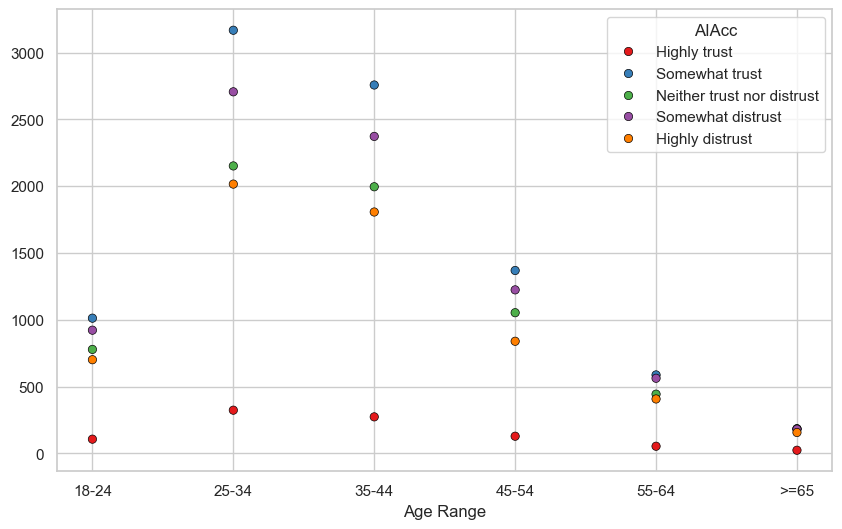

In [41]:
sns.set(style="whitegrid")
plt.subplots(figsize=(10, 6))
sns.scatterplot(contigency3, 
                palette="Set1", 
                sizes=(20,200), 
                alpha=1, 
                markers='o',
                edgecolor="black",
                legend="brief"
                )

plt.xlabel("Age Range")

plt.show()



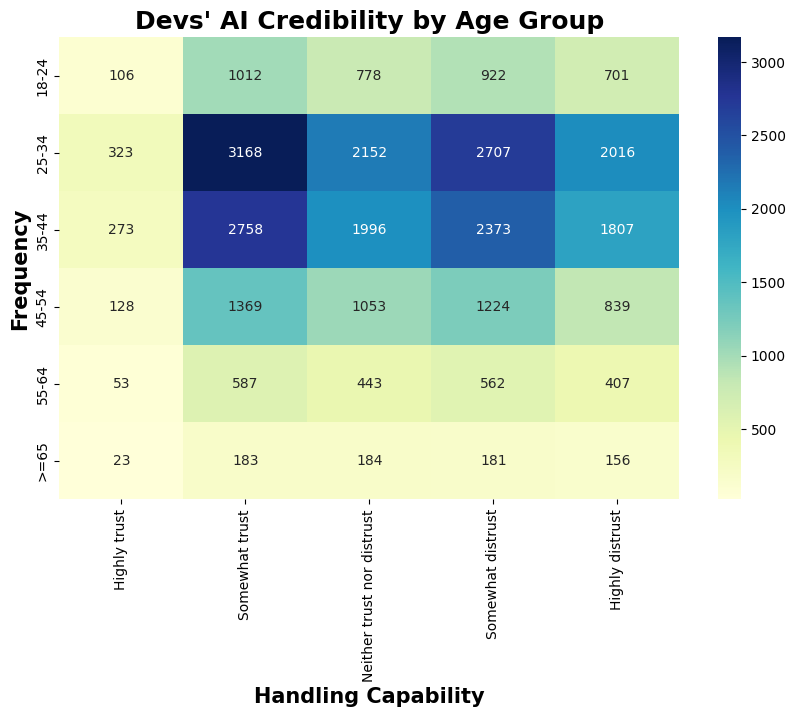

In [33]:
plt.subplots(figsize=(10,6))
sns.heatmap(contigency3,annot=True, fmt="d", cmap="YlGnBu")

plt.title("Devs' AI Credibility by Age Group", fontsize = 18, fontweight = 'bold')
plt.xlabel("Handling Capability", fontsize = 15, fontweight = 'bold')
plt.ylabel("Frequency", fontsize = 15, fontweight = 'bold')
plt.show()

In [34]:
# Hypothesis 4: There is no relationship between devs' 
# years of experience (YrsOfExp) and the degree of complexity 
# that devs think AI can handle (AIComplex).

In [35]:
contigency4 = pd.crosstab(resultAI['YrsOfExp'], resultAI['AIComplex'])
display(contigency4)

AIComplex,Bad,"Good, but not great",I don't use AI for complex tasks,Neither good or bad,Very poor,Very well
YrsOfExp,,,,,,
1.0,335,403,218,183,257,77
2.0,347,436,184,203,286,70
3.0,435,448,232,218,315,59
4.0,311,446,163,213,253,59
5.0,372,451,230,232,302,86
...,...,...,...,...,...,...
58.0,3,0,2,0,0,0
59.0,0,1,2,0,0,0
60.0,1,2,3,3,0,1


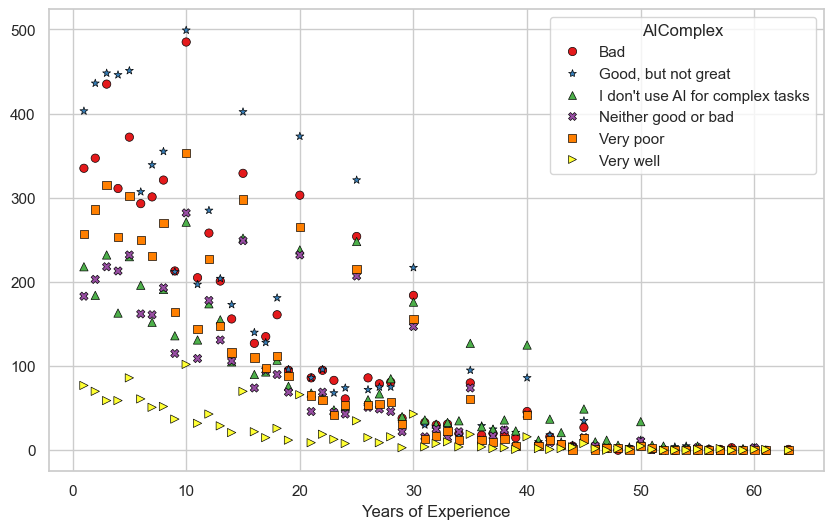

In [54]:
sns.set(style="whitegrid")
plt.subplots(figsize=(10, 6))
sns.scatterplot(contigency4, 
                palette="Set1", 
                sizes=(20,200), 
                alpha=1, 
                markers=('o', '*','^','X', 's','>'),
                edgecolor="black",
                legend="brief"
                )

plt.xlabel("Years of Experience")

plt.show()



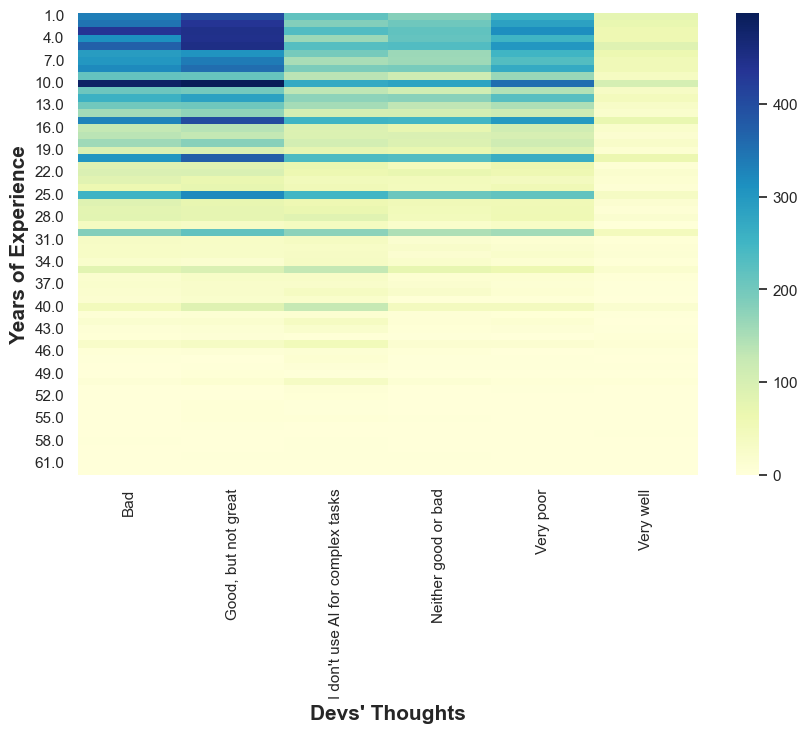

In [45]:
plt.subplots(figsize=(10,6))
sns.heatmap(contigency4,annot=False, fmt="d", cmap="YlGnBu")

plt.xlabel("Devs' Thoughts", fontsize = 15, fontweight = 'bold')
plt.ylabel("Years of Experience", fontsize = 15, fontweight = 'bold')
plt.show()